<a href="https://colab.research.google.com/github/nurfnick/Operations_Research/blob/main/ChapterRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Introduction
Regression is a huge topic but we'll try to cover the basics here with the idea that you will use regression often in business settings and that all the details will not be needed.

We will mostly focus on the Method of Least Squares here.  The idea is to make a prediction and to minimize the error in that prediction by minimizing the sum of the squares of that error:

$$
SSE = \sum_{i=1}^n\left(y_i-\hat {y_i}\right)^2
$$



## Derivation

To derive the linear regression formula, we assume that $\hat y$ is linear,
$$
\hat y = \beta_0 +\beta_1 x
$$

Then we plug this into the sum of squares error and take the partial derivatives with respect to $\beta_0$ and $\beta_1$.  To minimize we then set those derivatives to zero and solve the system.

$$
\nabla SSE(\beta_0,\beta_1) =
\left(
\sum -2(y_i-\beta_0 - \beta_1 x_i)
,
\sum -2(y_i-\beta_0 - \beta_1 x_i)x_i
\right)
$$

Setting each of these to zero and simplifying the summations, we arrive at
$$
\sum y_i = n\beta_0 +\beta_1\sum x_i
$$
$$
\sum x_iy_i = \beta_0\sum x_i +\beta_1\sum x^2_i
$$

Eliminating and solving, we see that
$$
\beta_1 = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}
$$

and
$$
\beta_0 = \frac{\sum y_i - \beta_1\sum x_i}n
$$

Some times these are written using the bar notation, $\bar x = \frac{\sum x_i}n$

$$
\beta_0 = \bar y - \beta_1\bar x
$$

$$
\beta_1 = \frac{\bar{xy}-\bar x\bar y}{\bar{x^2} - \left(\bar x\right)^2}
$$

### Example

Given the points $(0,5),(3,4),(7,8),(2,5)$, find the linear regression.

In [6]:
x = [0,3,7,2]
y = [5,4,8,5]
n = len(x)

meanx = sum(x)/n
meany = sum(y)/n
sumsquarex = 0
for i in range(n):
  sumsquarex += x[i]**2
sumsquarex /= n

xy = 0
for i in range(n):
  xy +=x[i]*y[i]
xy/=n


In [8]:
b1 = (xy - meanx*meany)/(sumsquarex-meanx**2)
b1

0.46153846153846156

In [10]:
b0 = meany - b1*meanx
b0

4.115384615384615

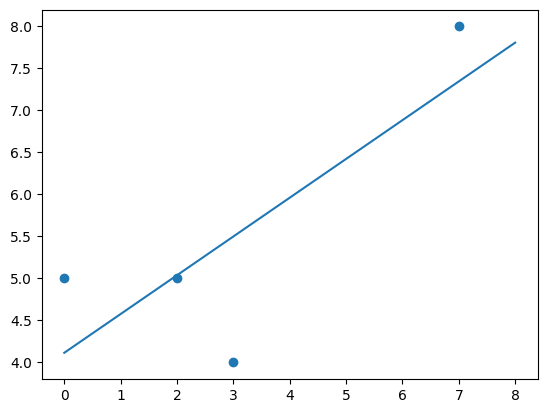

In [11]:
def line(x):
  return b1*x+b0

import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0,8,100)
ys = line(xs)

plt.plot(xs,ys)
plt.scatter(x,y)

## Multiple Regression

For multiple regression, we will ask that there is some linear transformation from $\vec x$ to $y$.  So we want
$$
y = \beta_1x_1 +\beta_2x_2 +\cdots +\beta_n x_n
$$

We can accomplish this by considering all the $y$ in a column matrix and all the $x$ in a matrix then
$$
Y = X\mathbf{\beta}
$$

But we want to find the $\mathbf{\beta}$ that solve this equation.  We assume that $X$ is rank $n$, then $X^TX$ is invertible so
$$
X^TY = X^TX\beta
$$
so
$$
\beta = \left(X^TX\right)^{-1}X^TY
$$